# Edge detection

## 2.2 Laplacian of Gaussian

In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

#### 1. Apply a 5 x 5 Laplacian of Gaussian edge detector to the image 'woman'.

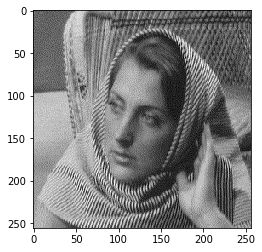

In [13]:
woman = cv2.imread('woman.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(woman, cmap='gray')

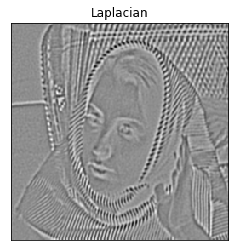

In [14]:
filter_size = 5
women_gaussian = cv2.GaussianBlur(woman, (filter_size, filter_size), 0)
woman_lap = cv2.Laplacian(women_gaussian, cv2.CV_32F, ksize=5)

# plot
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])
plt.imshow(woman_lap, cmap = "gray")